# Thurstone's crime scale

This is a reproduction of the crime scale presentd in Thurstone's 1927 paper, *The Methods of Paired Comparisons for Social Values*.

In [1]:
%matplotlib inline

In [2]:
import choix
import matplotlib.pyplot as plt
import numpy as np
import thesis

In [3]:
thesis.setup_plotting()

Thesis settings loaded!


In [4]:
mat = np.transpose(np.loadtxt("data/ccdata-fixed.csv", delimiter=",", dtype=int))

with open("data/ccdata-labels.txt") as f:
    labels = list(line.strip() for line in f)

In [5]:
params = thesis.thurstone_mle(mat)

/Users/maystre/.virtualenvs/thesis/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


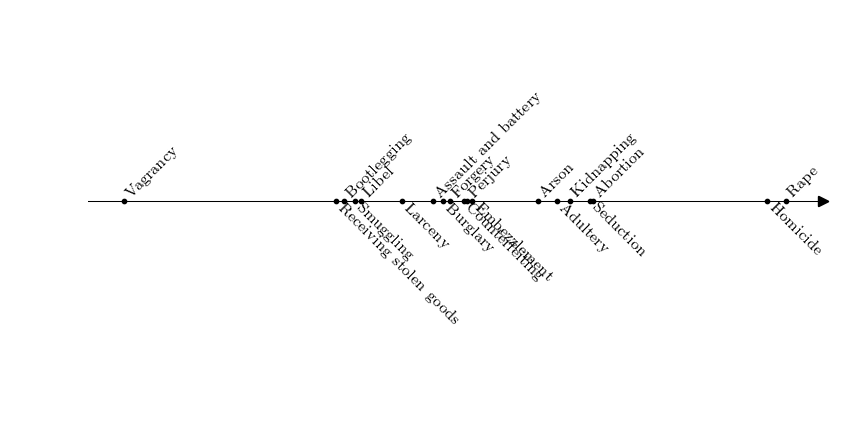

In [6]:
fig, ax = plt.subplots(figsize=(5.78, 3.0))
ax.set_axis_off()
ax.scatter(params, np.zeros_like(params), color="black", s=3.0)

for i, (x, label) in enumerate(sorted(zip(params, labels))):
    if i % 2 == 0:
        ax.annotate(label, (x, 0), ha="left", va="bottom", rotation=45, fontsize=7)
    else:
        ax.annotate(label, (x, 0), ha="left", va="top", rotation=-45, fontsize=7)

ax.axhline(0.0, color="black", linewidth=0.5)
ax.scatter(max(params) + 0.2, 0, marker=">", color="black", s=20.0)
ax.set_xlim(right=max(params) + 0.23)
fig.savefig("crimescale.pdf")